#Активное обучение

По хорошей традиции испортируем все, что понадобится.

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as mse
import pylab as pl
%pylab inline

from operator import itemgetter

COUNT_OF_MODELS = 15

Populating the interactive namespace from numpy and matplotlib


Теперь подгрузим данные.

In [2]:
SPAM_TRAIN_PATH = "../DataSets/spam.train.txt"
SPAM_TEST_PATH = "../DataSets/spam.test.txt"

train_data = np.loadtxt(SPAM_TRAIN_PATH)
train_y, train_x = train_data[::, 0], train_data[::, 1::]
test_data = np.loadtxt(SPAM_TEST_PATH)
test_y, test_x = test_data[::, 0], test_data[::, 1::]

А вот теперь "активно поучимся".

In [3]:
def get_vote_entropy_max(models, x):
    ent = np.zeros(x.shape[0])
    cnt_md = len(models)
    res = np.zeros(x.shape[0] * 2).reshape(x.shape[0], 2)
    for i, md in enumerate(models):
        res += np.array(md.predict_proba(x))
    
    res0 = np.array(map(itemgetter(0), res))
    res1 = np.array(map(itemgetter(1), res))
    
    for res_ in (res0, res1):
        ent += -(res_ / cnt_md) * np.log(res_ / cnt_md)
        
    return ent.argmax()

def get_addition(x, st):
    sz = x.shape[0]
    ls = list()
    for i in range(sz):
        if i not in st:
            ls.append(i)
    return np.array(ls)

In [4]:
models = [LogisticRegression(random_state=i) for i in range(COUNT_OF_MODELS)]
current_set = {i for i in range(len(train_data) / 100)} | {len(train_data) - i for i in range(1, len(train_data) / 100)}
start_size = len(current_set)

COUNT_STEPS = train_x.shape[0] - len(current_set)
#COUNT_STEPS = 500


error = np.zeros(COUNT_STEPS)
check_model = LogisticRegression(random_state=0)

print "COUNT_STEPS=%d" % COUNT_STEPS

for i in range(COUNT_STEPS):
    if i > 0 and i % 100 == 0:
        print "Current step: %d" % i
    tr = np.array(list(current_set))
    for md in models:
        md.fit(train_x[tr], train_y[tr])
    
    check_model.fit(train_x[tr], train_y[tr])
    error[i] = mse(np.array(map(itemgetter(1), check_model.predict_proba(test_x))), test_y) 
    
    add = get_addition(train_x, current_set)
    mx = get_vote_entropy_max(models, train_x[add])
    current_set.add(add[mx])

COUNT_STEPS=6954
Current step: 100
Current step: 200
Current step: 300
Current step: 400
Current step: 500
Current step: 600
Current step: 700
Current step: 800
Current step: 900
Current step: 1000
Current step: 1100
Current step: 1200
Current step: 1300
Current step: 1400
Current step: 1500
Current step: 1600
Current step: 1700
Current step: 1800
Current step: 1900
Current step: 2000
Current step: 2100
Current step: 2200
Current step: 2300
Current step: 2400
Current step: 2500
Current step: 2600
Current step: 2700
Current step: 2800
Current step: 2900
Current step: 3000
Current step: 3100
Current step: 3200
Current step: 3300
Current step: 3400
Current step: 3500
Current step: 3600
Current step: 3700
Current step: 3800
Current step: 3900
Current step: 4000
Current step: 4100
Current step: 4200
Current step: 4300
Current step: 4400
Current step: 4500
Current step: 4600
Current step: 4700
Current step: 4800
Current step: 4900
Current step: 5000
Current step: 5100
Current step: 5200
Curr

In [9]:
check_model = LogisticRegression(random_state=0)
tr = np.random.permutation(train_x.shape[0])
COUNT_STEPS = train_x.shape[0]

error_rand = np.zeros(COUNT_STEPS)

for i in range(10, COUNT_STEPS + 1):
    if i > 0 and i % 100 == 0:
        print "Current step: %d" % i
    check_model.fit(train_x[tr[:i]], train_y[tr[:i]])
    error_rand[i - 1] = mse(np.array(map(itemgetter(1), check_model.predict_proba(test_x))), test_y)

Current step: 100
Current step: 200
Current step: 300
Current step: 400
Current step: 500
Current step: 600
Current step: 700
Current step: 800
Current step: 900
Current step: 1000
Current step: 1100
Current step: 1200
Current step: 1300
Current step: 1400
Current step: 1500
Current step: 1600
Current step: 1700
Current step: 1800
Current step: 1900
Current step: 2000
Current step: 2100
Current step: 2200
Current step: 2300
Current step: 2400
Current step: 2500
Current step: 2600
Current step: 2700
Current step: 2800
Current step: 2900
Current step: 3000
Current step: 3100
Current step: 3200
Current step: 3300
Current step: 3400
Current step: 3500
Current step: 3600
Current step: 3700
Current step: 3800
Current step: 3900
Current step: 4000
Current step: 4100
Current step: 4200
Current step: 4300
Current step: 4400
Current step: 4500
Current step: 4600
Current step: 4700
Current step: 4800
Current step: 4900
Current step: 5000
Current step: 5100
Current step: 5200
Current step: 5300
Cu

In [16]:
check_model.fit(train_x, train_y)
full_data_error = mse(np.array(map(itemgetter(1), check_model.predict_proba(test_x))), test_y)

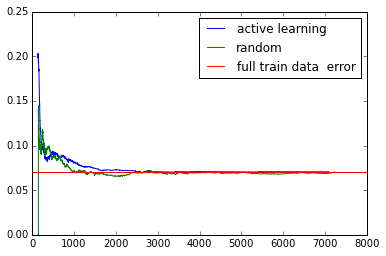

In [17]:
pl.plot(np.arange(start_size, start_size + len(error)), error, label="active learning")
pl.plot(np.arange(start_size, start_size + len(error_rand)), error_rand, color="g", label="random")
pl.axhline(y=full_data_error, color='r', label="full train data  error")
pl.legend()
pl.show()